## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def h5load(ifile, label):
    #try:
    with pd.HDFStore(ifile, 'r') as store:
        try:
            data = store[label] 
            metadata = store.get_storer(label).attrs.metadata
            return data, metadata

        except KeyError:
            print("No key",label,ifile)
            return 0, 0
    # except:
    #     print("Some error occurred", ifile)
    #     return 0, 0

In [6]:
f = '../out.hdf5'
data, m = h5load(f,'CL')
event_vars, m = h5load(f,'vars')

No key CL ../out.hdf5


In [12]:
event_vars

ntracks  ngood_fastjets           ht  eta_ak4jets0  phi_ak4jets0  \
0          273               2  1803.966797     -0.293824      0.601858   
1          227               2  2011.864258     -0.640027      1.349578   
2          269               2  1982.866333      0.088594      1.632506   
3          261               2  2356.033447      0.306225      2.673933   
4          297               2  1893.386719     -0.093956     -1.250647   
...        ...             ...          ...           ...           ...   
12583      282               3  1959.514160     -0.665040      3.005296   
12584      250               2  2365.791016     -0.679596     -1.709688   
12585      352               2  1808.626465     -1.049102     -2.117813   
12586      374               2  2325.519287      0.272307      0.435344   
12587      260               2  1751.439697      0.447270      0.239743   

       pt_ak4jets0  eta_ak4jets1  phi_ak4jets1  pt_ak4jets1  eta_ak4jets2  \
0       855.331116      0.277540     -2.658578   736.047180      0.476910   
1      1050.272583      0.139130     -1.772967   961.591614           NaN   
2       909.510559      0.701849     -1.333666   851.165344      0.906660   
3      1200.055420      1.544853     -0.529732   711.330627      0.280173   
4       916.637207     -1.247451      1.622136   626.136719     -0.225068   
...            ...           ...           ...          ...           ...   
12583   706.458252      2.145025     -0.794752   661.582458     -0.077364   
12584  1118.969727     -0.990960      1.178135   660.508240     -0.973763   
12585   932.167908     -0.324337      1.039932   876.458496           NaN   
12586  1042.377441      0.643632     -2.231031   709.270630      1.597055   
12587  1006.259399     -1.181979     -2.888627   745.180298           NaN   

       ...  ISR_rho0_CL  ISR_rho1_CL   SUEP_pt_CL  SUEP_eta_CL  SUEP_phi_CL  \
0      ...    16.680364     1.950305   893.445523     0.374503    -2.503140   
1      ...    15.617011     0.592049  1082.781800    -0.648830     1.332686   
2      ...     0.000000     0.000000   955.524450     0.098817     1.648153   
3      ...    14.838119     1.650274  1183.410650     1.204402    -0.464194   
4      ...    18.428904     0.460285   898.457684    -1.069941     1.731790   
...    ...          ...          ...          ...          ...          ...   
12583  ...     0.400443     9.985974   733.841444    -0.685938     3.003401   
12584  ...     0.000000     0.015338  1180.676611    -0.683208    -1.720774   
12585  ...     7.289954    10.153887   943.099538    -0.372934     1.046436   
12586  ...     0.000000     0.000000  1144.122785     0.324776     0.466769   
12587  ...    17.577500     0.349873   825.646092    -1.238416    -2.858818   

       SUEP_mass_CL    ISR_pt_CL  ISR_eta_CL  ISR_phi_CL  ISR_mass_CL  
0        464.830012   880.812165   -0.299145    0.599199   195.578729  
1        261.274398   998.781454    0.143822   -1.777415   228.106642  
2        256.125719   982.823605    0.843221   -1.560450   600.464244  
3        839.639930  1232.869299    0.310533    2.675760   274.350075  
4        593.623813   952.280594   -0.085231   -1.262838   252.742235  
...             ...          ...         ...         ...          ...  
12583    202.037399   745.458248    2.103639   -0.860144   332.732504  
12584    292.365886  1006.620492   -1.061116    1.504722   500.563114  
12585    351.833603  1008.922582   -1.105764   -2.101473   366.040183  
12586    430.208007  1073.477629    1.146420   -2.651860   905.590022  
12587    317.517809  1045.468848    0.454118    0.255757   269.605019  

[12588 rows x 75 columns]

In [9]:
jets = event_vars['ngood_fastjets'][data['event_index_ch']]
htloose = event_vars['ht_loose'][data['event_index_ch']]
httight = event_vars['ht_tight'][data['event_index_ch']]

TypeError: 'int' object is not subscriptable

(array([41577.,     0.,     0.,     0.,     0.,  3529.,     0.,     0.,
            0.,   110.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

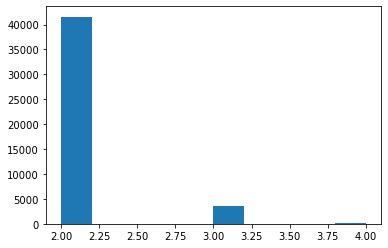

In [8]:
plt.hist(jets)

107915952.921875
107785752.125


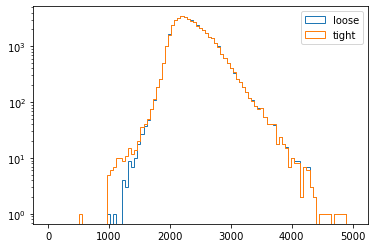

In [9]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))